# Importing Libraries and Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
import re
import pickle

# Load the cleaned resume dataset
clean_df = pd.read_csv(r"C:\Users\icham\OneDrive\Desktop\clean_resume_data.csv\clean_resume_data.csv")

# Display the shape and the first few rows of the dataset
print(clean_df.shape)
print(clean_df.head())

# Display the count of each category
print(clean_df['Category'].value_counts())


(2484, 3)
         ID Category                                            Feature
0  16852973       HR  hr administrator marketing associate hr admini...
1  22323967       HR  hr specialist hr operations summary media prof...
2  33176873       HR  hr director summary years experience recruitin...
3  27018550       HR  hr specialist summary dedicated driven dynamic...
4  17812897       HR  hr manager skill highlights hr skills hr depar...
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER           

# Visualizing Category Distribution

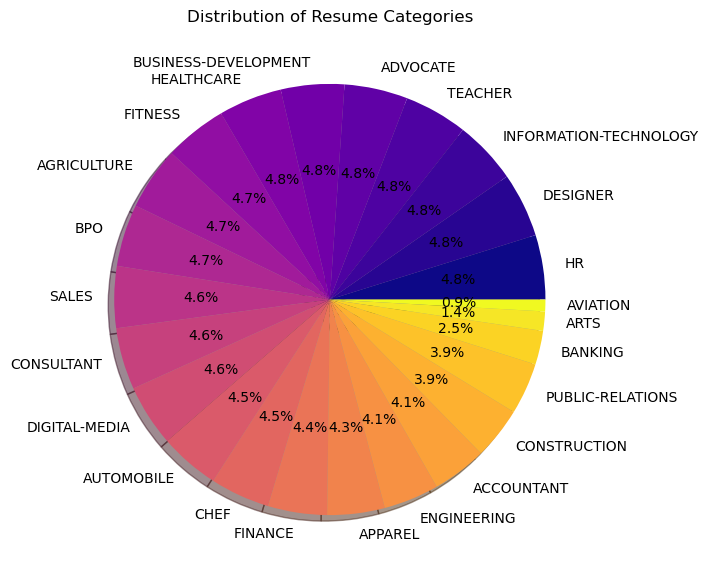

In [2]:
# Plot the distribution of categories as a pie chart
counts = clean_df['Category'].value_counts()
labels = clean_df['Category'].unique()

plt.figure(figsize=(7,7))
plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, colors=plt.cm.plasma(np.linspace(0, 1, len(labels))))
plt.title('Distribution of Resume Categories')
plt.show()


# Balancing the Dataset

In [3]:
# Define the maximum count among all categories
max_count = clean_df['Category'].value_counts().max()

# Resample each category to match the maximum count
balanced_data = []
for category in clean_df['Category'].unique():
    category_data = clean_df[clean_df['Category'] == category]
    if len(category_data) < max_count:
        # Perform oversampling for categories with fewer samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        # Perform undersampling for categories with more samples
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

# Concatenate the balanced data for all categories
balanced_df = pd.concat(balanced_data)

# Display the count of each category after balancing
print(balanced_df['Category'].value_counts())

# Check for and drop any null values
balanced_df.dropna(inplace=True)
print(balanced_df.isnull().sum())


HR                        120
DESIGNER                  120
ARTS                      120
BANKING                   120
PUBLIC-RELATIONS          120
CONSTRUCTION              120
ACCOUNTANT                120
ENGINEERING               120
APPAREL                   120
FINANCE                   120
CHEF                      120
AUTOMOBILE                120
DIGITAL-MEDIA             120
CONSULTANT                120
SALES                     120
BPO                       120
AGRICULTURE               120
FITNESS                   120
HEALTHCARE                120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  120
TEACHER                   120
INFORMATION-TECHNOLOGY    120
AVIATION                  120
Name: Category, dtype: int64
ID          0
Category    0
Feature     0
dtype: int64


# Splitting Data and Vectorization

In [4]:
# Define features and labels
X = balanced_df['Feature']
y = balanced_df['Category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the TF-IDF representation of the test set
print(X_test_tfidf)


  (0, 29678)	0.058372547840923
  (0, 29635)	0.027486664103746648
  (0, 29632)	0.030145869232033436
  (0, 29442)	0.0860279990423501
  (0, 29402)	0.028479261124386323
  (0, 29195)	0.06335579656963128
  (0, 28950)	0.0921844219855474
  (0, 28614)	0.06876240504285053
  (0, 28607)	0.023560028080139808
  (0, 28590)	0.08342076543887733
  (0, 28449)	0.04800404610596008
  (0, 28276)	0.03494656007635794
  (0, 28270)	0.013889477294196014
  (0, 28158)	0.023292609714201506
  (0, 28116)	0.013897390103515723
  (0, 28052)	0.03659107513635957
  (0, 27917)	0.009715590477368795
  (0, 27909)	0.04105101254561208
  (0, 27807)	0.04896608800118829
  (0, 27600)	0.05799175931933246
  (0, 27570)	0.0674633976633174
  (0, 27475)	0.05507054047044243
  (0, 27276)	0.028990661574443546
  (0, 27206)	0.009890500950423238
  (0, 27202)	0.05367612119334299
  :	:
  (575, 2505)	0.01860126622806003
  (575, 2367)	0.05573943138001846
  (575, 2347)	0.0522017241004347
  (575, 2342)	0.10916659372923743
  (575, 2191)	0.0334787328752

# Training and Evaluating the Model

Accuracy: 0.8368055555555556
                        precision    recall  f1-score   support

            ACCOUNTANT       0.77      0.95      0.85        21
              ADVOCATE       0.95      0.69      0.80        29
           AGRICULTURE       1.00      0.74      0.85        23
               APPAREL       0.94      0.81      0.87        21
                  ARTS       1.00      0.59      0.74        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.91      1.00      0.95        30
               BANKING       1.00      0.78      0.88        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.44      0.61      0.51        18
                  CHEF       0.97      1.00      0.98        28
          CONSTRUCTION       0.92      0.96      0.94        25
            CONSULTANT       0.95      0.65      0.77        31
              DESIGNER       0.95      0.75      0.84        28
         D

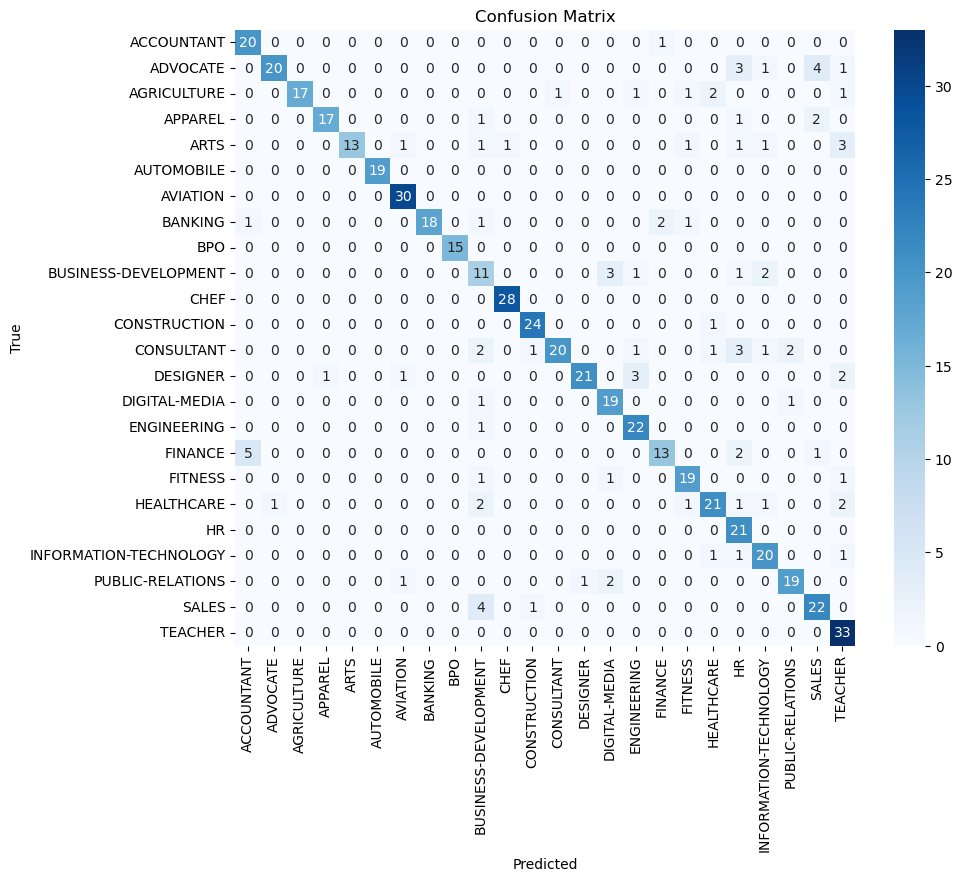

In [5]:
# Initialize and train the RandomForest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Helper Functions for Cleaning and Prediction

In [6]:
# Function to clean the resume text
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

# Function to predict the category of a given resume
def predict_category(resume_text):
    resume_text = cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category


# Example usage

In [7]:
# Example Usage
resume_file = """Objective:
A creative and detail-oriented Designer with a passion for visual communication and brand identity seeking opportunities to leverage design skills in a dynamic and collaborative environment.

Education:
- Bachelor of Fine Arts in Graphic Design, XYZ College, GPA: 3.7/4.0
- Diploma in Web Design, ABC Institute, GPA: 3.9/4.0

Skills:
- Proficient in Adobe Creative Suite (Photoshop, Illustrator, InDesign)
- Strong understanding of typography, layout, and color theory
- Experience in both print and digital design
- Ability to conceptualize and execute design projects from concept to completion
- Excellent attention to detail and time management skills

Experience:
Graphic Designer | XYZ Design Studio
- Created visually appealing graphics for various marketing materials, including brochures, flyers, and social media posts
- Collaborated with clients to understand their design needs and deliver creative solutions that align with their brand identity
- Worked closely with the marketing team to ensure consistency in brand messaging across all platforms

Freelance Designer
- Designed logos, branding materials, and website layouts for small businesses and startups
- Managed multiple projects simultaneously while meeting tight deadlines and maintaining quality standards
- Established and maintained strong client relationships through clear communication and exceptional service

Projects:
- Rebranding Campaign for XYZ Company: Led a team to redesign the company's logo, website, and marketing collateral, resulting in a 30% increase in brand recognition
- Packaging Design for ABC Product Launch: Developed eye-catching packaging designs for a new product line, contributing to a successful launch and positive customer feedback

Certifications:
- Adobe Certified Expert (ACE) in Adobe Illustrator
- Responsive Web Design Certification from Udemy

Languages:
- English (Native)
- Spanish (Intermediate)
"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: DESIGNER


In [8]:
# Example Usage
resume_file = """Objective:
Dedicated and results-oriented Banking professional with a strong background in financial analysis and customer service seeking opportunities to contribute to a reputable financial institution. Eager to leverage expertise in risk management, investment strategies, and relationship building to drive business growth and client satisfaction.

Education:
- Bachelor of Business Administration in Finance, XYZ University, GPA: 3.8/4.0
- Certified Financial Analyst (CFA) Level I Candidate

Skills:
- Proficient in financial modeling and analysis using Excel, Bloomberg Terminal, and other financial software
- Extensive knowledge of banking products and services, including loans, mortgages, and investment products
- Strong understanding of regulatory compliance and risk management practices in the banking industry
- Excellent communication and interpersonal skills, with a focus on building rapport with clients and colleagues
- Ability to work efficiently under pressure and adapt to changing market conditions

Experience:
Financial Analyst | ABC Bank
- Conducted financial analysis and risk assessment for corporate clients, including credit analysis, financial statement analysis, and cash flow modeling
- Developed customized financial solutions to meet clients' needs and objectives, resulting in increased revenue and client retention
- Collaborated with cross-functional teams to identify new business opportunities and optimize existing processes

Customer Service Representative | DEF Bank
- Provided exceptional customer service to bank clients, addressing inquiries, resolving issues, and promoting banking products and services
- Processed transactions accurately and efficiently, including deposits, withdrawals, and account transfers
- Educated customers on various banking products and services, helping them make informed financial decisions

Internship | GHI Investments
- Assisted portfolio managers with investment research and analysis, including industry and company-specific research, financial modeling, and performance analysis
- Prepared investment presentations and reports for clients, highlighting investment opportunities and performance metrics
- Conducted market research and analysis to identify trends and opportunities in the financial markets

Certifications:
- Certified Financial Planner (CFP)
- Series 7 and Series 63 Securities Licenses

Languages:
- English (Native)
- Spanish (Proficient)

"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: BANKING


# Save the model

In [9]:
# Save the trained model and the TF-IDF vectorizer
pickle.dump(rf_classifier, open(r"C:\Users\icham\OneDrive\Desktop\python\resume_job_matching_screening\models\rf_classifier_categorization.pkl", 'wb'))
pickle.dump(tfidf_vectorizer, open(r"C:\Users\icham\OneDrive\Desktop\python\resume_job_matching_screening\models\tfidf_vectorizer_categorization.pkl", 'wb'))
